In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [95]:
con = sqlite3.connect('superheroes.db')
df = pd.read_sql("SELECT * FROM superheroes WHERE eye_color = 'Green Eyes'", con)

In [96]:
df

,id,name,eye_color,hair_color,appearance_count,first_appearance,first_appearance_year
0,18,Kyle Rayner (New Earth),Green Eyes,Black Hair,716.0,"1994, January",1994
1,20,Alexander Luthor (New Earth),Green Eyes,None,677.0,"1986, October",1986
2,21,Roy Harper (New Earth),Green Eyes,Red Hair,654.0,"1941, November",1941
3,24,Garfield Logan (New Earth),Green Eyes,Green Hair,595.0,"1965, November",1965
4,29,James Olsen (New Earth),Green Eyes,Red Hair,557.0,"1986, October",1986
...,...,...,...,...,...,...,...
286,6850,Lucifar (New Earth),Green Eyes,Brown Hair,NaN,"1977, December",1977
287,6857,Ra's al Ghul (New Earth),Green Eyes,Grey Hair,NaN,"1971, June",1971
288,6877,Flash (Wally West),Green Eyes,Red Hair,NaN,"1960, January",1960
289,6882,Doris Zuel (New Earth),Green Eyes,Red Hair,NaN,"1944, June",1944


In [97]:
df = df.drop(columns= ['appearance_count', 'first_appearance_year'])
df = df.drop_duplicates()
df = df.dropna()
df

,id,name,eye_color,hair_color,first_appearance
0,18,Kyle Rayner (New Earth),Green Eyes,Black Hair,"1994, January"
2,21,Roy Harper (New Earth),Green Eyes,Red Hair,"1941, November"
3,24,Garfield Logan (New Earth),Green Eyes,Green Hair,"1965, November"
4,29,James Olsen (New Earth),Green Eyes,Red Hair,"1986, October"
5,31,Joker (New Earth),Green Eyes,Green Hair,"1940, June"
...,...,...,...,...,...
286,6850,Lucifar (New Earth),Green Eyes,Brown Hair,"1977, December"
287,6857,Ra's al Ghul (New Earth),Green Eyes,Grey Hair,"1971, June"
288,6877,Flash (Wally West),Green Eyes,Red Hair,"1960, January"
289,6882,Doris Zuel (New Earth),Green Eyes,Red Hair,"1944, June"


In [98]:
df = df.rename(columns= {'name': 'Name', 'eye_color': 'Eye_Color',
                         'hair_color': 'Hair_Color', 'first_appearance': 'Birth_Year'})
df

,id,Name,Eye_Color,Hair_Color,Birth_Year
0,18,Kyle Rayner (New Earth),Green Eyes,Black Hair,"1994, January"
2,21,Roy Harper (New Earth),Green Eyes,Red Hair,"1941, November"
3,24,Garfield Logan (New Earth),Green Eyes,Green Hair,"1965, November"
4,29,James Olsen (New Earth),Green Eyes,Red Hair,"1986, October"
5,31,Joker (New Earth),Green Eyes,Green Hair,"1940, June"
...,...,...,...,...,...
286,6850,Lucifar (New Earth),Green Eyes,Brown Hair,"1977, December"
287,6857,Ra's al Ghul (New Earth),Green Eyes,Grey Hair,"1971, June"
288,6877,Flash (Wally West),Green Eyes,Red Hair,"1960, January"
289,6882,Doris Zuel (New Earth),Green Eyes,Red Hair,"1944, June"


In [99]:
df['Name'] = df['Name'].str.split(pat = '(').str[0]
df

,id,Name,Eye_Color,Hair_Color,Birth_Year
0,18,Kyle Rayner,Green Eyes,Black Hair,"1994, January"
2,21,Roy Harper,Green Eyes,Red Hair,"1941, November"
3,24,Garfield Logan,Green Eyes,Green Hair,"1965, November"
4,29,James Olsen,Green Eyes,Red Hair,"1986, October"
5,31,Joker,Green Eyes,Green Hair,"1940, June"
...,...,...,...,...,...
286,6850,Lucifar,Green Eyes,Brown Hair,"1977, December"
287,6857,Ra's al Ghul,Green Eyes,Grey Hair,"1971, June"
288,6877,Flash,Green Eyes,Red Hair,"1960, January"
289,6882,Doris Zuel,Green Eyes,Red Hair,"1944, June"


In [100]:
df['Birth_Year'] = df['Birth_Year'].str.split(pat = ',').str[0].astype(int)
df, df.dtypes

(       id             Name   Eye_Color  Hair_Color  Birth_Year
 0      18     Kyle Rayner   Green Eyes  Black Hair        1994
 2      21      Roy Harper   Green Eyes    Red Hair        1941
 3      24  Garfield Logan   Green Eyes  Green Hair        1965
 4      29     James Olsen   Green Eyes    Red Hair        1986
 5      31           Joker   Green Eyes  Green Hair        1940
 ..    ...              ...         ...         ...         ...
 286  6850         Lucifar   Green Eyes  Brown Hair        1977
 287  6857    Ra's al Ghul   Green Eyes   Grey Hair        1971
 288  6877           Flash   Green Eyes    Red Hair        1960
 289  6882      Doris Zuel   Green Eyes    Red Hair        1944
 290  6886        Catwoman   Green Eyes  Black Hair        1940
 
 [249 rows x 5 columns],
 id             int64
 Name          object
 Eye_Color     object
 Hair_Color    object
 Birth_Year     int64
 dtype: object)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_7968\3215817626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = hair_counts.index,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Red Hair'),
  Text(1, 0, 'Black Hair'),
  Text(2, 0, 'Blond Hair'),
  Text(3, 0, 'Brown Hair'),
  Text(4, 0, 'White Hair'),
  Text(5, 0, 'Green Hair'),
  Text(6, 0, 'Strawberry Blond Hair'),
  Text(7, 0, 'Purple Hair'),
  Text(8, 0, 'Grey Hair'),
  Text(9, 0, 'Orange Hair'),
  Text(10, 0, 'Blue Hair')])

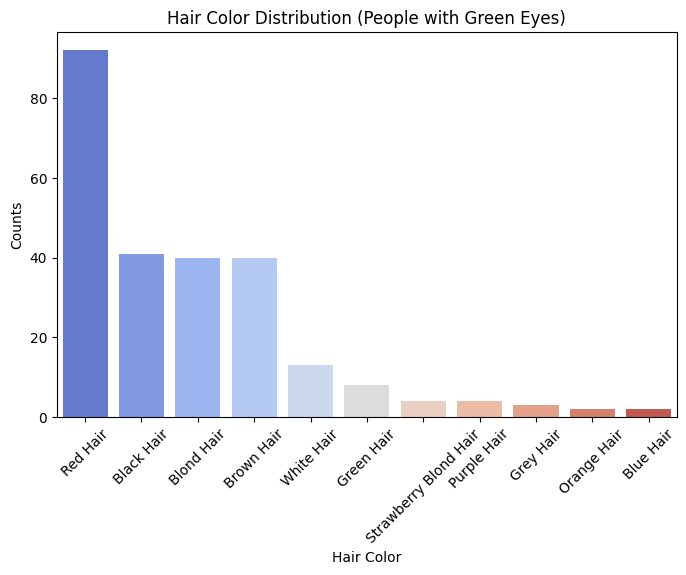

In [ ]:
hair_counts = df['Hair_Color'].value_counts()

plt.figure(figsize = (8, 5))
sns.barplot(x = hair_counts.index,
            y = hair_counts.values,
            palette = 'coolwarm')
plt.title('Hair Color Distribution (People with Green Eyes)')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Hair Color Distribution (People with Green Eyes)')

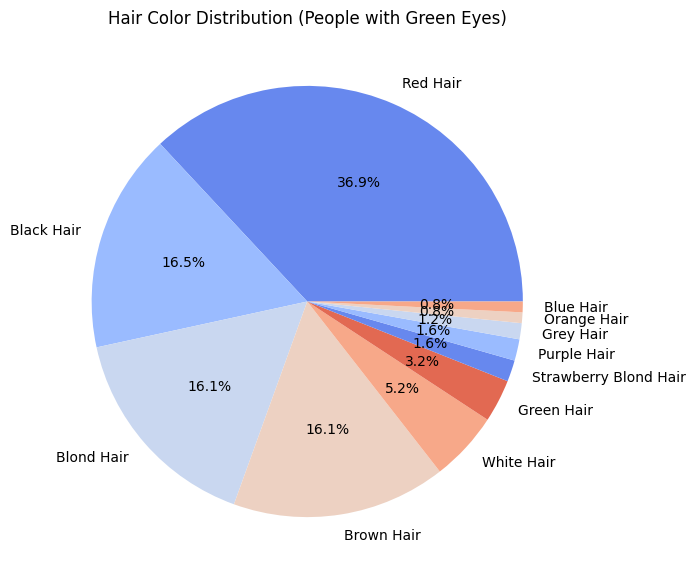

In [102]:
plt.figure(figsize = (7, 7))
plt.pie(hair_counts, labels= hair_counts.index,
        autopct = '%1.1f%%', colors = sns.color_palette('coolwarm'))
plt.title('Hair Color Distribution (People with Green Eyes)')

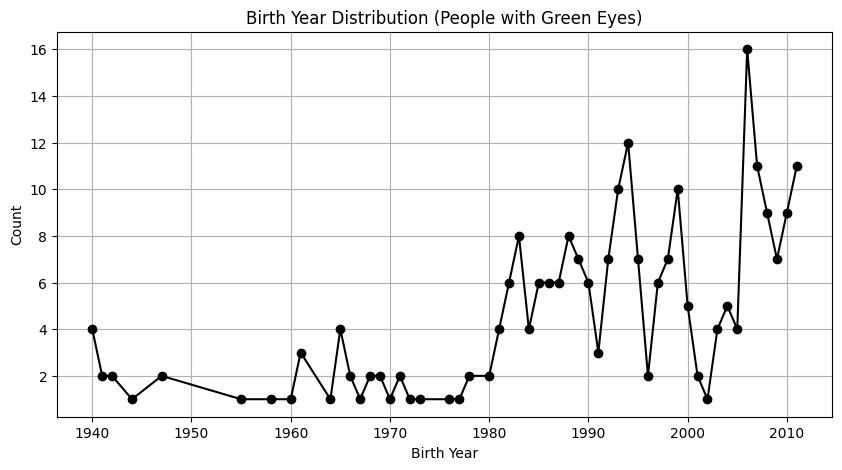

In [107]:
year_counts = df['Birth_Year'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
plt.plot(year_counts.index,
         year_counts.values,
         marker = 'o', linestyle = '-', color = 'BLACK')
plt.title('Birth Year Distribution (People with Green Eyes)')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.grid(True)